# Geographic Data Science: An Introduction

## Geographic Data Science with Python
- Geographic Data Science: The study of geographic problems using data and computational methods.
- Intersection of GIS, spatial statistics, and data science
- Aside from the usual cross-sectional data that we have been working with, we will also be working with spatial data.
- This could be data that is explicitly geographic, such as GPS coordinates, or data that has a geographic component, such as addresses or zip codes.
- Application to Economics:
    - Geographic market definition in antitrust proceedings
    - Spatial econometrics - study of spatial relationships in economic data such as spatial autocorrelation in house prices
    - Urban economics - study of cities and their spatial organization
    - Environmental economics - study of the spatial distribution of pollution and its effects
    - Regional economics - study of the spatial distribution of economic activity
    - Transportation economics - study of the spatial distribution of transportation networks
    - Economic geography - study of the spatial distribution of economic activity

## Spatial Data
- Spatial data is data that has a geographic component to it.
- Importance: 
    - Many datasets have a geographic component to them.
    - Geographic data can be used to answer questions that are not possible with non-geographic data.

### Types of Spatial Data:

1. **Vector Data**: 
- Vector data represents geographic features as points, lines, and polygons.
- Points: Represent a single location in space.
- Lines: Represent a series of connected points.
- Polygons: Represent a closed shape made up of a series of connected points.
- usual file formats:
    - Shapefiles (.shp): widely used but also requires multiple files (.shp, .shx, .dbf, etc.)
    - GeoJSON (.geojson): JSON-based format that is easy to read and write, used in web applications
    - GeoPackage (.gpkg): SQLite-based format that can store multiple layers in a single file
    - KML (.kml): XML-based format used in Google Earth

2. **Raster Data**:
- Raster data represents geographic features as a grid of cells.
- *gridded spatial data* such as satellite imagery, digital elevation models, and climate data.
- examples:
    - Land cover data: classifies each cell as forest, water, urban, etc.
    - Elevation data: gives the elevation of each cell above sea level.
    - Climate data: gives temperature, precipitation, etc. for each cell.
- usual file formats:
    - GeoTIFF (.tif): widely used format for raster data
    - NetCDF (.nc): format for storing gridded data in climate science
    - HDF5 (.h5): format for storing large datasets in scientific computing
- Source of raster data:
    - NASA Earth Observing System Data and Information System (EOSDIS)
    - US Geological Survey (USGS)
    - National Oceanic and Atmospheric Administration (NOAA)
    - European Space Agency (ESA)
    - Google Earth Engine

3. **Coordinate Reference Systems (CRS)**:
- Coordinate reference systems (CRS) are used to define the location of geographic data.
- Geographic data is usually stored in a two-dimensional space, with the x-axis representing longitude and the y-axis representing latitude.
- WHY IMPORTANT: Different CRSs can represent the same location in different ways, so it is important to know the CRS of your data.
- Common CRSs:
    - WGS 84 (EPSG:4326): standard CRS for GPS data
    - Web Mercator (EPSG:3857): standard CRS for web maps
    - Universal Transverse Mercator (UTM): standard CRS for large-scale mapping
    - State Plane Coordinate System (SPCS): standard CRS for US states
    - Ordnance Survey National Grid (OSGB): standard CRS for UK

4. **Basic Spatial Operations**:
- Spatial operations are used to analyze and wrangle spatial data.
- Examples:
    - Buffering: creating a buffer around a point, line, or polygon
    - Clipping: extracting a subset of a dataset based on a spatial boundary
    - Overlay: combining two datasets based on their spatial relationship
    - Interpolation: estimating values at unsampled locations based on nearby samples
    - Proximity: finding the nearest point, line, or polygon to a given location


## Libraries for Geographic Data Science

### Key Libraries
1. Geopandas
- Extends the popular Pandas library to support spatial data.
- does vector data handling such as spatial joins and conversion to shapefiles

2. Shapely
- Does geometric operations such as buffers, and intersections to form a clip

3. RasterIO
- Package used to work with raster data

4. Folium
- Used to create interactive webmaps

5. osmnx
- can be used to extract street networks and urban features

In [3]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

import googlemaps
import osmnx as ox
import networkx as nx

from shapely.geometry import Point

In [8]:
path= '/Users/moxballo/Library/Mobile Documents/com~apple~CloudDocs/Documents/UPSE/AY202425_2 Econ 198/'
sc = pd.read_excel(path + "03_data/shopping_centers_complete.xlsx")

In [18]:
PH_shp = '/Users/moxballo/Documents/PH_shapefiles/'

# load a shapefile
gdf = gpd.read_file(PH_shp + 'phl_admbnda_adm2_psa_namria_20231106.shp')

# check the crs
print(gdf.crs)

EPSG:4326


In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ADM2_EN     88 non-null     object        
 1   ADM2_PCODE  88 non-null     object        
 2   ADM1_EN     88 non-null     object        
 3   ADM1_PCODE  88 non-null     object        
 4   ADM0_EN     88 non-null     object        
 5   ADM0_PCODE  88 non-null     object        
 6   date        88 non-null     datetime64[ms]
 7   validOn     88 non-null     datetime64[ms]
 8   validTo     88 non-null     object        
 9   Shape_Leng  88 non-null     float64       
 10  Shape_Area  88 non-null     float64       
 11  ADM2ALT1EN  3 non-null      object        
 12  AREA_SQKM   88 non-null     float64       
 13  geometry    88 non-null     geometry      
dtypes: datetime64[ms](2), float64(3), geometry(1), object(8)
memory usage: 9.8+ KB


In [10]:
gdf['ADM2_EN'].value_counts()

ADM2_EN
Ilocos Norte                           1
Ilocos Sur                             1
Metropolitan Manila Fourth District    1
Metropolitan Manila Third District     1
Metropolitan Manila Second District    1
                                      ..
Aklan                                  1
Sorsogon                               1
Masbate                                1
Catanduanes                            1
Special Geographic Area                1
Name: count, Length: 88, dtype: int64

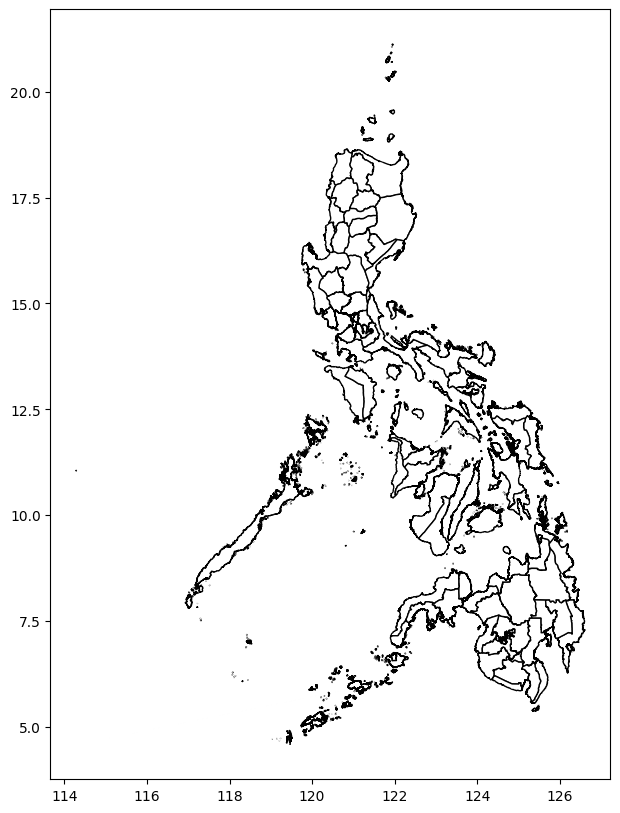

In [4]:
# print the shapely gdf
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='white', edgecolor='black')
plt.show()

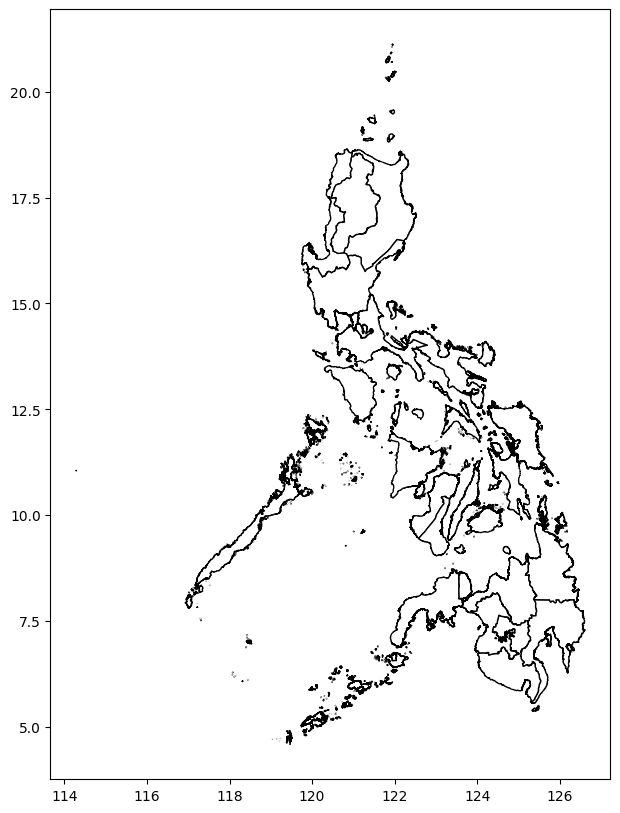

In [11]:
gdf_reg = gpd.read_file(PH_shp + 'phl_admbnda_adm1_psa_namria_20231106.shp')
fig, ax = plt.subplots(figsize=(10, 10))
gdf_reg.plot(ax=ax, color='white', edgecolor='black')
plt.show()

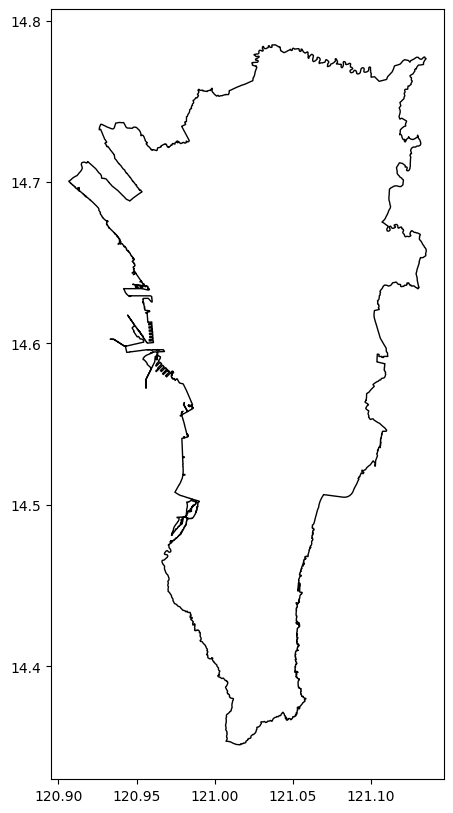

In [13]:
ncr = gdf_reg[gdf_reg['ADM1_EN']=="National Capital Region (NCR)"]

fig, ax = plt.subplots(figsize=(10, 10))
ncr.plot(ax=ax, color='white', edgecolor='black')
plt.show()

/Users/moxballo/Library/Mobile Documents/com~apple~CloudDocs/Documents/UPSE/AY202425_2 Econ 198/.venv/lib/python3.13/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


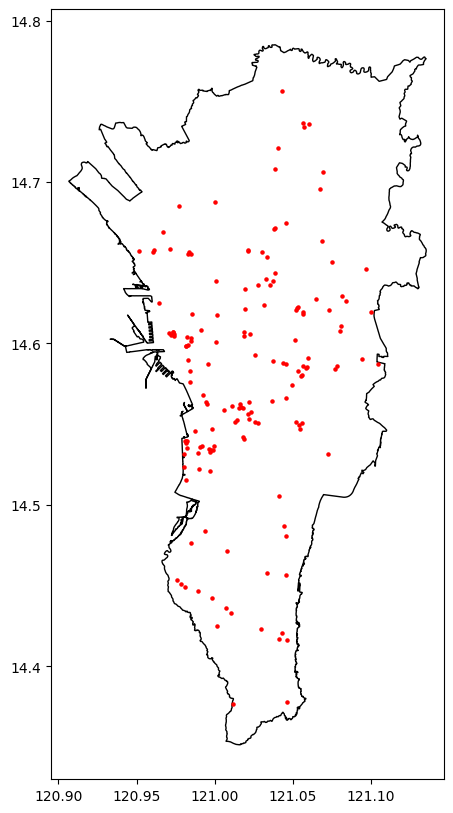

In [19]:
# overlay the coordinates from the sc file 
sc_gdf = gpd.GeoDataFrame(sc, geometry=gpd.points_from_xy(sc.long, sc.lat)) # convert to GeoDataFrame
sc_gdf.crs = {'init': 'epsg:4326'} 

fig, ax = plt.subplots(figsize=(10, 10))
ncr.plot(ax=ax, color='white', edgecolor='black')
sc_gdf.plot(ax=ax, color='red', markersize=5)
plt.show()

## Exercise:
- Download the ADM files from https://data.humdata.org/dataset/cod-ab-phl
- use the ADM3 file 

- Expected outputs
    1. Use the https://en.wikipedia.org/wiki/List_of_shopping_malls_in_Metro_Manila to screen all the major shopping centers in NCR. Create a column 'major_shop'
    2. Color the shopping centers by entity. Create a column 'entity'
    3. Create a column containing the city/municipality where the entity is located.